In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

Mnist data is the handwritten number, we 70k images.
We have image of 28 x 28 pixel data
In this we will perform ANN and perform the classification.

In this the output layer will have 10 nodes as we have 0 to 9 digit. 
Below is the architecture
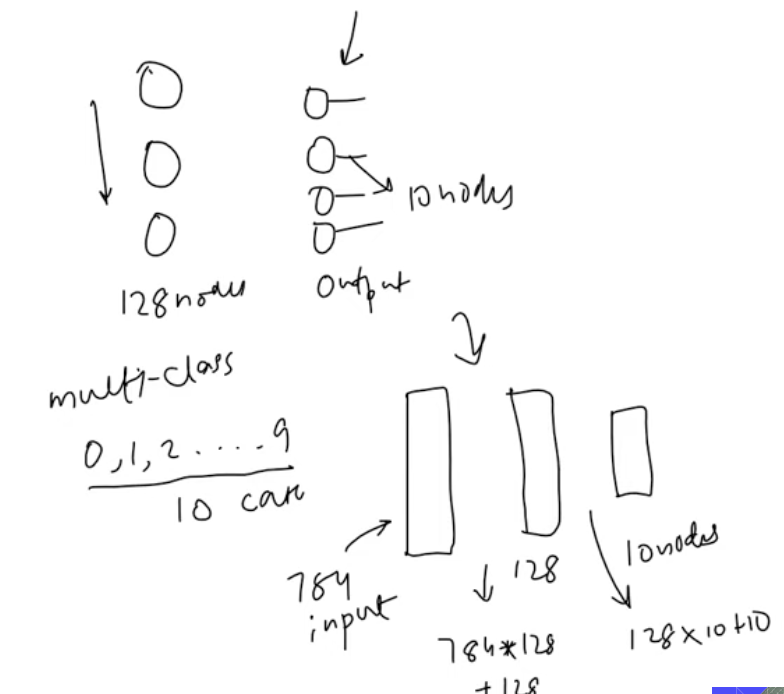

In [2]:
# the data is already includes in Keras
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [7]:
# the data is not in the form of image, its in the form of pixel and a numpy array of 28 by 28
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

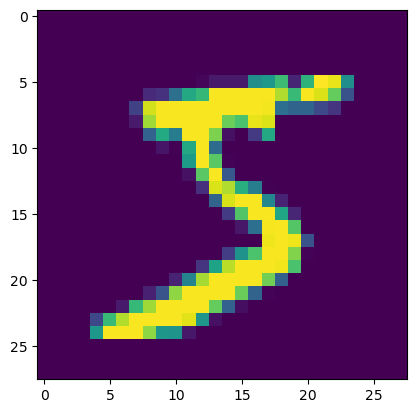

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
# Bring values between 0 to 1
# The reason behind doing this is that weith neural netwrok, the number should be in similar range
# When numbers are in similar range model gives better weight result
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = Sequential()

# Input layer: Faltten layer if we have multi dimensional data
# We have data in 28 x 28, total 784. We need to flatten the data
# that means we need 784 inputs in 1- D
model.add(Flatten(input_shape=(28,28)))

#Hidden layer 1
model.add(Dense(128,activation='relu'))
# Hideen layer 2
model.add(Dense(32,activation='relu'))

# Output layer
"""
When ever we have more than one node in output layer, We use softmax activation functon for multi classifaction
"""
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
784*128 + 128 + 128* 32 + 32 + 32*10 + 10

104938

In [15]:
"""
sparse_categorical_crossentropy when using this we need not to perform one hot encoding with the labels,
where as 

categorical_crossentropy we have to perform one hot encoding to labels
"""
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=25,
                    validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.4803 - loss: 4.0129 - val_accuracy: 0.7911 - val_loss: 0.8838
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.8196 - loss: 0.7025 - val_accuracy: 0.8917 - val_loss: 0.4884
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.8972 - loss: 0.4192 - val_accuracy: 0.9362 - val_loss: 0.2954
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.9303 - loss: 0.2856 - val_accuracy: 0.9294 - val_loss: 0.2771
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9456 - loss: 0.2135 - val_accuracy: 0.9525 - val_loss: 0.2025
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9618 - loss: 0.1559 - val_accuracy: 0.9478 - val_loss: 0.2152
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9644 - loss: 0.1420 - val_accuracy: 0.9572 - val_loss: 0.1719
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.9704 -

In [17]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step


In [21]:
# it will give probability of all numbers being that number from 0 to 9
y_prob

array([[7.86835212e-27, 2.82172582e-17, 1.53240980e-23, ...,
        1.00000000e+00, 0.00000000e+00, 2.02022795e-12],
       [4.36131886e-15, 2.54083066e-08, 1.00000000e+00, ...,
        1.59554481e-10, 5.27548395e-23, 1.03276633e-13],
       [1.42403367e-10, 1.00000000e+00, 3.50807301e-13, ...,
        1.47122059e-09, 5.98870847e-21, 1.91682499e-13],
       ...,
       [1.72296839e-22, 1.90192540e-25, 8.72125931e-23, ...,
        1.45546698e-25, 2.05240633e-38, 1.21816391e-17],
       [3.36332589e-12, 6.71328773e-34, 1.65598965e-29, ...,
        0.00000000e+00, 6.11380888e-24, 6.44864149e-21],
       [7.91877142e-09, 4.20681906e-37, 2.23760766e-25, ...,
        0.00000000e+00, 1.21627677e-35, 1.60251855e-23]], dtype=float32)

In [23]:
y_prob.shape

(10000, 10)

In [24]:
# Finding what index has the highest probabilty
y_pred = y_prob.argmax(axis=1)

In [25]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9712

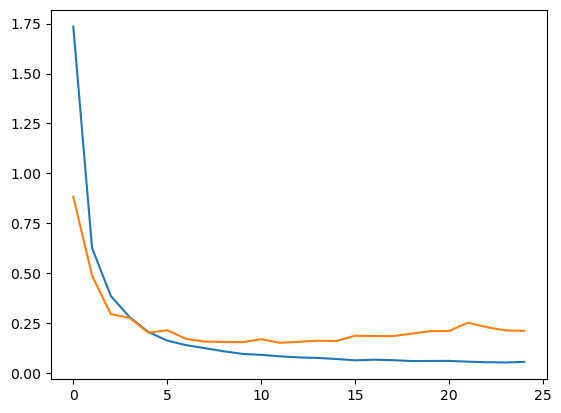

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

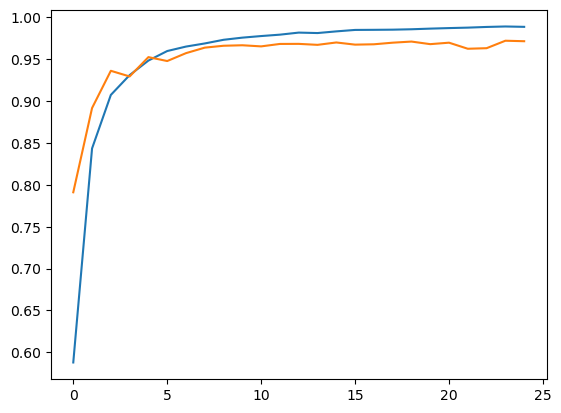

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [34]:
X_test[1].reshape(1, 28, 28)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125,
         171, 255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253,
         253, 253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
         213, 142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,
           0,   0,   0

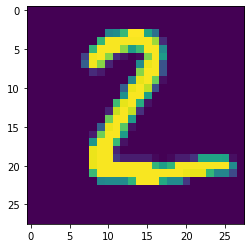

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])